In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns 

In [ ]:
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Urządzenie
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_indices = list(range(0, int(len(full_trainset) * 0.85)))
validation_indices = list(range(int(len(full_trainset) * 0.85), len(full_trainset)))
trainset = Subset(full_trainset, train_indices)
validation_set = Subset(full_trainset, validation_indices)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=64, shuffle=False)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

![Convolutional layer](warstwa_konwulencyjna.gif)
![Convolutional neural network](convolutional_network.jpg)

Using device: cuda
Epoch 1/10, Train Loss: 0.1455, Train Accuracy: 95.56%, Validation Loss: 0.0680, Validation Accuracy: 98.28%
Epoch 2/10, Train Loss: 0.0415, Train Accuracy: 98.66%, Validation Loss: 0.0578, Validation Accuracy: 98.31%
Epoch 3/10, Train Loss: 0.0246, Train Accuracy: 99.21%, Validation Loss: 0.0429, Validation Accuracy: 98.81%
Epoch 4/10, Train Loss: 0.0164, Train Accuracy: 99.45%, Validation Loss: 0.0627, Validation Accuracy: 98.30%
Epoch 5/10, Train Loss: 0.0128, Train Accuracy: 99.56%, Validation Loss: 0.0492, Validation Accuracy: 98.93%
Epoch 6/10, Train Loss: 0.0096, Train Accuracy: 99.68%, Validation Loss: 0.0597, Validation Accuracy: 98.72%
Epoch 7/10, Train Loss: 0.0094, Train Accuracy: 99.70%, Validation Loss: 0.0510, Validation Accuracy: 98.89%
Epoch 8/10, Train Loss: 0.0097, Train Accuracy: 99.69%, Validation Loss: 0.0581, Validation Accuracy: 98.67%
Epoch 9/10, Train Loss: 0.0060, Train Accuracy: 99.79%, Validation Loss: 0.0580, Validation Accuracy: 98.93%


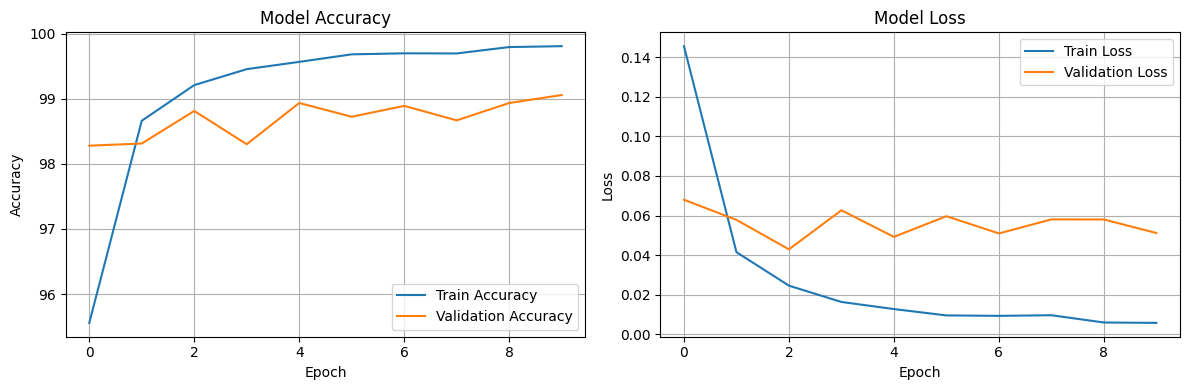

Model zapisany jako 'mnist_model.pth'
Zapisano X_test i y_test


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        pass

    def forward(self, x):
        pass

model = CNN().to(device)
criterion = None
optimizer = None

def train_model(model, trainloader, validloader, epochs=10):
    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []
    

    return train_losses, valid_losses, train_accuracies, valid_accuracies

train_losses, valid_losses, train_accuracies, valid_accuracies = train_model(model, trainloader, validation_loader, epochs=10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

torch.save(model.state_dict(), "mnist_model.pth")
print("Model zapisany jako 'mnist_model.pth'")
np.save("X_test.npy", testset.data.numpy())
np.save("y_test.npy", testset.targets.numpy())

Model załadowany z 'mnist_model.pth'
Załadowano X_test i y_test


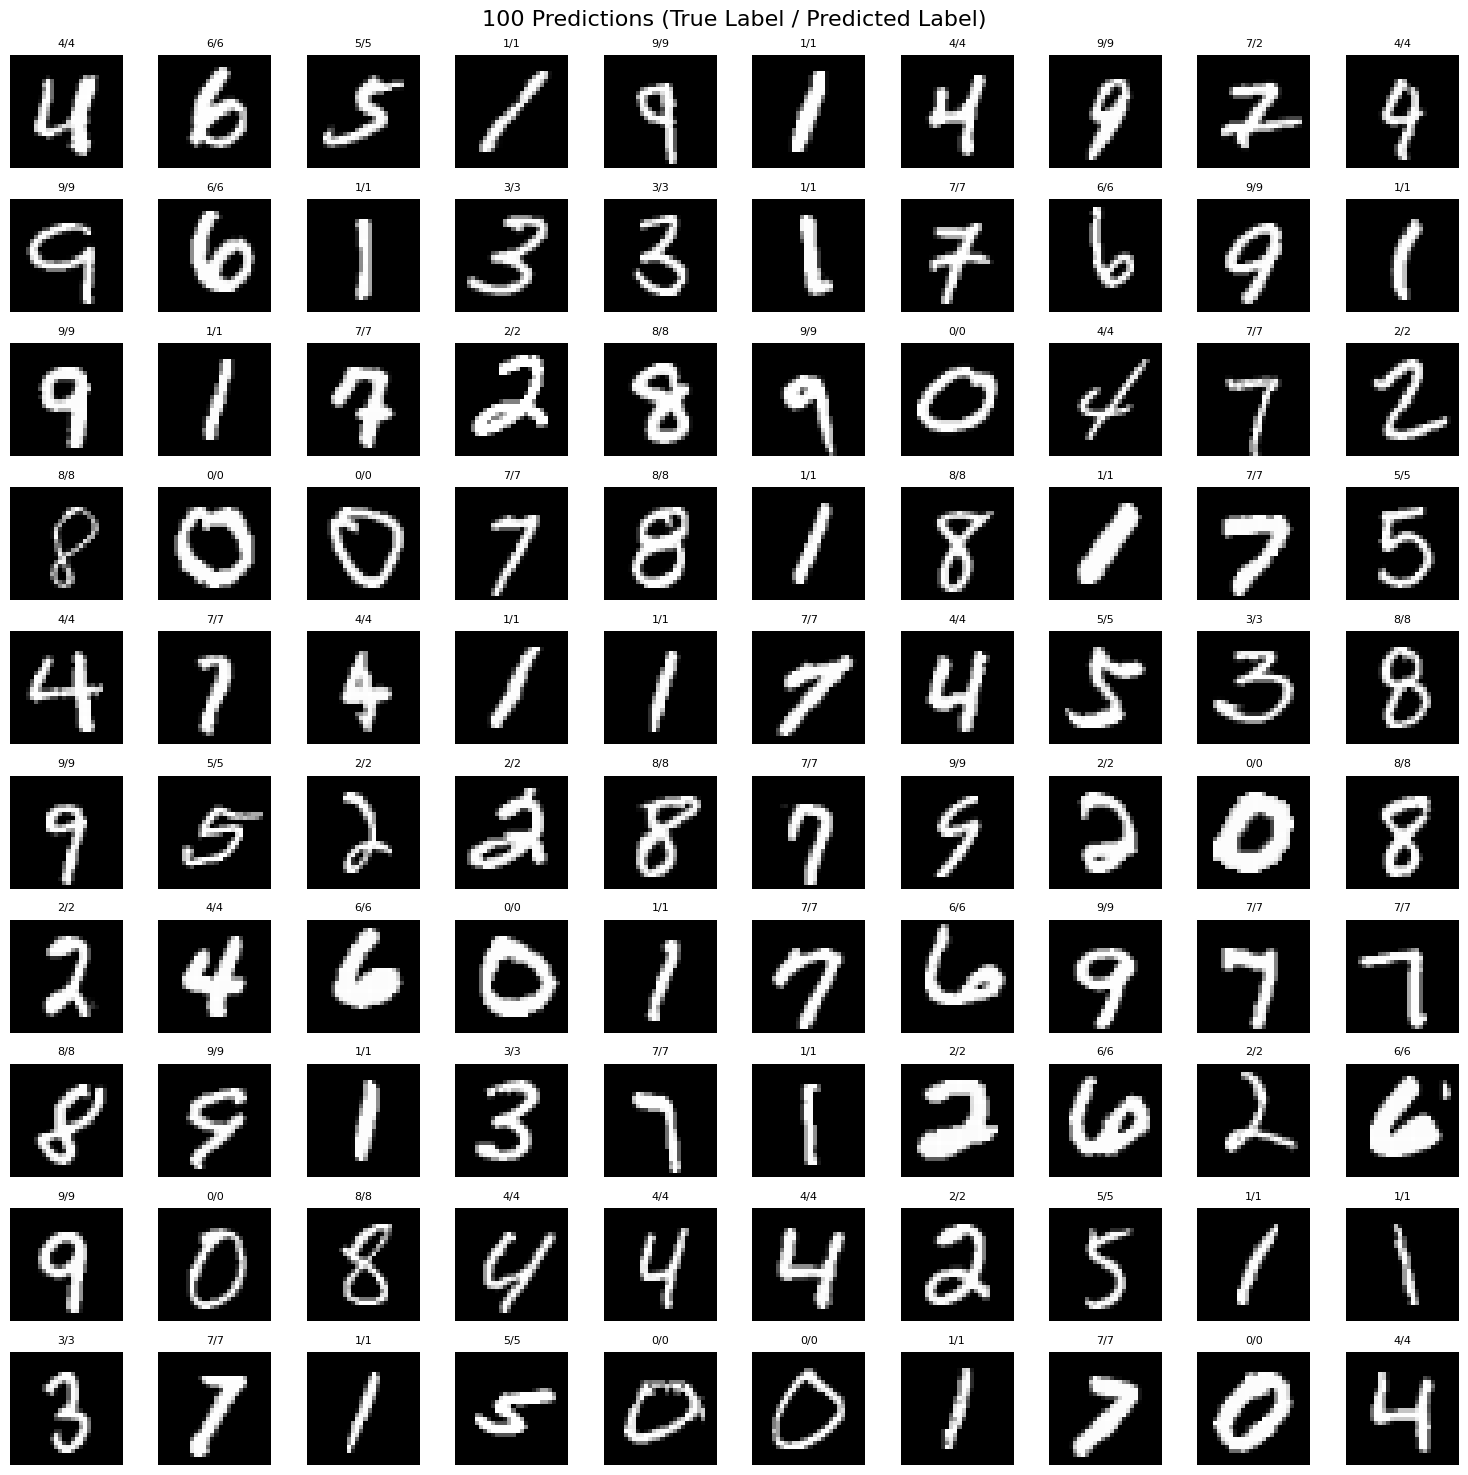

Zapisano siatkę predykcji jako '100_predictions_grid.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
model = CNN().to(device)
model.load_state_dict(torch.load("mnist_model.pth"))
model.eval()
print("Załadowano model")

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

np.random.seed(None) #42
indices = np.random.choice(len(X_test), 100, replace=False)

images = torch.tensor(X_test[indices], dtype=torch.float32).unsqueeze(1) / 255.0
images = (images - 0.5) / 0.5
images = images.to(device)
true_labels = y_test[indices]

with torch.no_grad():
    outputs = model(images)
    predicted_labels = torch.argmax(outputs, dim=1).cpu().numpy()

fig, axes = plt.subplots(10, 10, figsize=(15, 15))
fig.suptitle("100 Predictions (True Label / Predicted Label)", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[indices[i]], cmap='gray')
    ax.axis('off')
    ax.set_title(f"{true_labels[i]}/{predicted_labels[i]}", fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

plt.savefig("100_predictions_grid.png")
print("Zapisano siatkę predykcji jako '100_predictions_grid.png'")

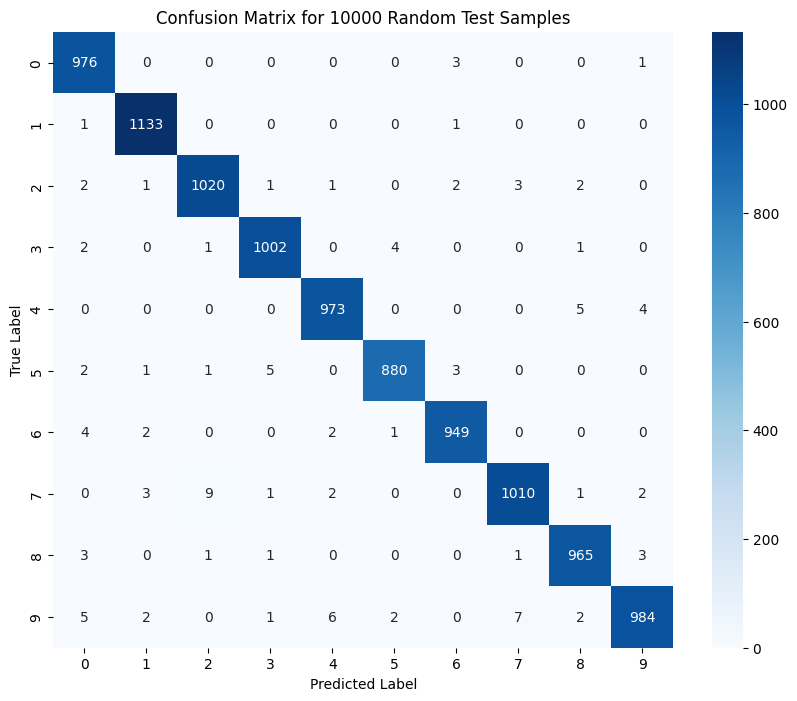

Zapisano macierz pomyłek jako 'confusion_matrix.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
indices = np.random.choice(len(X_test), 10000, replace=False)

images = torch.tensor(X_test[indices], dtype=torch.float32).unsqueeze(1) / 255.0
images = (images - 0.5) / 0.5
images = images.to(device)
true_labels = y_test[indices]

with torch.no_grad():
    outputs = model(images)
    predicted_labels = torch.argmax(outputs, dim=1).cpu().numpy()

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix for 10000 Random Test Samples")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

plt.savefig("confusion_matrix.png")
print("Zapisano macierz pomyłek jako 'confusion_matrix.png'")

In [ ]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
    ])
    img_tensor = transform(img).unsqueeze(0)
    img_tensor = (img_tensor - 0.5) / 0.5
    return img_tensor.to(device), transform(img)

def predict_image(model, image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
        predicted_label = torch.argmax(output, dim=1).cpu().numpy()[0]
    return predicted_label

def test_custom_image():
    image_path = "cyfra.png"
    try:
        image_tensor, resized_img = load_and_preprocess_image(image_path)
        predicted_label = predict_image(model, image_tensor)
        print(f"Przewidziana cyfra: {predicted_label}")
        
        resized_img_np = resized_img.squeeze().numpy()
        
        plt.figure(figsize=(4, 4))
        plt.imshow(resized_img_np, cmap='gray')
        plt.title(f"Przewidziana cyfra: {predicted_label}")
        plt.axis('off')
        plt.show()
        
    except Exception as e:
        print(f"Błąd: {e}")

test_custom_image()